In [33]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [34]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('../Resources/lending_data.csv')
lending_df = pd.read_csv(data)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [35]:
# Separate the data into labels and features
# Separate the y variable, the labels
y=lending_df["loan_status"]

# Separate the X variable, the features
x= lending_df.drop(columns='loan_status')

In [36]:
# Review the y variable Series
print(y.value_counts())


loan_status
0    75036
1     2500
Name: count, dtype: int64


In [37]:
# Review the X variable DataFrame
print(x.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [38]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    random_state =1,
                                                    stratify=y)
x_train.shape

(58152, 7)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [39]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1,max_iter=200)
classifier

# Fit the model using training data
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [40]:
# Make a prediction using the testing data
print(f"Training Data score: {classifier.score(x_train,y_train)}")
print(f"Testing Data score: {classifier.score(x_test,y_test)}")

predictions=classifier.predict(x_test)
results = pd.DataFrame({"Prediction": predictions, "Actual":y_test}).reset_index(drop=True)
results.head(10)

Training Data score: 0.9914878250103177
Testing Data score: 0.9924164259182832


,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

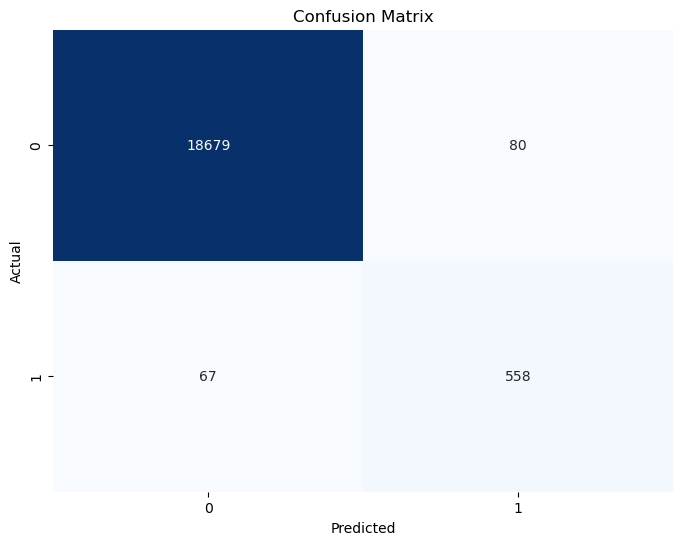

In [42]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Print the classification report for the model
target_names =["healthy loan", "high-risk loan"]
print(classification_report(y_test, predictions, target_names=target_names))

                precision    recall  f1-score   support

  healthy loan       1.00      1.00      1.00     18759
high-risk loan       0.87      0.89      0.88       625

      accuracy                           0.99     19384
     macro avg       0.94      0.94      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
Based on the provided classification report:

**For class 0 (healthy loans):

Precision: 100% (1.00) - This means that all the loans predicted as healthy were actually healthy.
Recall: 100% (1.00) - This indicates that all actual healthy loans were correctly identified by the model.
F1-score: 100% (1.00) - The harmonic mean of precision and recall is at 100% which is good
Support: 18,759 - This is the number of actual occurrences of healthy loans in the test dataset.

**For class 1 (high-risk loans):

Precision: 87% (0.87) - Among the loans predicted as high-risk, 87% were actually high-risk.
Recall: 89% (0.89) - The model correctly identified 89% of the actual high-risk loans.
F1-score: 88% (0.88) - The F1-score, which balances precision and recall, is also high.
Support: 625 - This is the number of actual occurrences of high-risk loans in the test dataset.
Accuracy: 99% - This is the overall accuracy of the model, indicating that 99% of the predictions were correct, which is also supported by the training and testing data sets values(Training Data score: 0.9914878250103177, Testing Data score: 0.9924164259182832)


**Conclusion:

The model performs very well for class 0, with good precision, recall, and F1-score.
For class 1, while precision, recall, and F1-score are slightly lower than class 0, they are still quite high, indicating strong predictive performance.
The high accuracy and high scores across all metrics suggest that the model is highly effective at distinguishing between healthy and high-risk loans.
Overall, based on this classification report, the logistic regression model appears to be very successful in predicting both healthy and high-risk loans.

---